# Dataset Augmentation

In [1]:
import sys
import pandas as pd
import numpy as np

## 1. Read dataset

In [2]:
dirname = '../../datasets/marked_start_mid_end/'
suffix = '.csv'

def read_from_file( file_name, rand_num):
    
    try:
        #full_file_name = file_name + str(rand_num) + "_kinect"
        full_file_name = file_name + str(rand_num)

        file_at_path = dirname + full_file_name + suffix

        data = pd.read_csv(file_at_path)
        
        return data, full_file_name
    
    except IOError as e:
        print(e)
        return None,None

## 2. Read files

### 2.1 The A series (A1-A159)

In [3]:
raw_data, full_file_name = read_from_file("A", 1)

#print(full_file_name)
print(raw_data.shape)

for i in range(2,160):
    input_data, full_file_name = read_from_file("A", i)
    
    if(full_file_name is None):
        continue
    else:
        #print(full_file_name)
        raw_data = raw_data.append(input_data, ignore_index = True)

print(raw_data.shape)

(229, 28)
[Errno 2] No such file or directory: '../../datasets/marked_start_mid_end/A60.csv'
[Errno 2] No such file or directory: '../../datasets/marked_start_mid_end/A107.csv'
(33093, 28)


### 2.2 The B series (B1-B22)

In [4]:
for i in range(1,23):
    input_data, full_file_name = read_from_file("B", i)
    
    if(full_file_name is None):
        continue
    else:
        #print(full_file_name)
        raw_data = raw_data.append(input_data, ignore_index = True)

print(raw_data.shape)

(38488, 28)


# Data augumentation

## <font color='green'> Mirror </font>

    'a' means all axis else 'x', 'y' or 'z'
    if Append calculated data will be appended to the input data

In [5]:
# 'a' means all axis else 'x', 'y' or 'z'
# if Append calculated data will be appended to the input data
def mirror(data, axis, append=False):
    
    try:
        
        if axis == 'a':
            target_labels = [col for col in raw_data.columns]
        else:
            axis = "_" + axis
            target_labels = [col for col in raw_data.columns if axis in col]

        aug_data_mirror = data.copy()

        for t in target_labels:
            temp = -aug_data_mirror[t]
            aug_data_mirror = aug_data_mirror.assign(**{t: temp.values})

        if append:
            return data.append(aug_data_mirror,ignore_index=True)

        return aug_data_mirror
    
    except IOError as e:
        print(e)
        return None

In [6]:
aug_data_x_mirror = mirror(raw_data,'x')
print(aug_data_x_mirror.shape)

(38488, 28)


In [7]:
aug_data_x_mirror_append = mirror(raw_data,'x', append=True)
print(aug_data_x_mirror_append.shape)

(76976, 28)


In [8]:
aug_data_a_mirror = mirror(raw_data,'a')
print(aug_data_a_mirror.shape)

(38488, 28)


In [9]:
aug_data_a_mirror_append = mirror(raw_data,'a', append=True)
print(aug_data_a_mirror_append.shape)

(76976, 28)


## <font color='green'> Multiplier </font>

    if multiplier > 1 strecth and if multiplier < 1 compress
    if Append calculated data will be appended to input data

In [10]:
# if multiplier > 1 strecth and if multiplier < 1 compress
# if Append calculated data will be appended to input data
def augMultiplier(data, multiplier, append=False):
    
    try:
        aug_data_offset = data.copy()
        aug_data_offset *= multiplier
        if append:
            return data.append(aug_data_offset,ignore_index=True)
        
        return aug_data_offset
    
    except IOError as e:
        print(e)
        return None

In [11]:
aug_data_offset = augMultiplier(raw_data, multiplier=2)
print(aug_data_offset.shape)

(38488, 28)


In [12]:
aug_data_offset_append = augMultiplier(raw_data, multiplier=0.5, append=True)
print(aug_data_offset_append.shape)

(76976, 28)


# Explain

#### CASE-1  Append False
    lets assume we have <font color='red'> A </font>
    we perform mirror, it will be <font color='red'> A-mirror </font>
    we perform multiplie, it will be <font color='red'> A-multiplier </font>

#### CASE-2  Append True for First one
    lets assume we have <font color='red'> A </font>
    we perform mirror, it will be <font color='red'> A + A-mirror </font>
    we perform multiplier, it will be <font color='red'> A-multiplier + A-mirror-multiplier </font>
    
#### CASE-3  Append True for all
    lets assume we have <font color='red'> A </font>
    we perform mirror, it will be <font color='red'> A + A-mirror </font>
    we perform multiplier, it will be <font color='red'> A + A-mirror + A-multiplier + A-mirror-multiplier </font>
    

## <font color='green'> Rotate </font>

In [13]:
def rotatePoint(angle, x,y):
    a = np.radians(angle)
    cosa = np.cos(a)
    sina = np.sin(a)
    return x*cosa - y*sina, x*sina + y*cosa

In [14]:
def rotate(data, angle, posenet=False):
    
    try:
        aug_data = data.copy()
        length = len(aug_data)
        if posenet:
            for index, row in aug_data.iterrows():
                head_x, head_y = rotatePoint(angle,row['head_x'],row['head_y'])
                leftShoulder_x, leftShoulder_y = rotatePoint(angle,row['leftShoulder_x'],row['leftShoulder_y'])
                rightShoulder_x, rightShoulder_y = rotatePoint(angle,row['rightShoulder_x'],row['rightShoulder_y'])
                leftElbow_x, leftElbow_y = rotatePoint(angle,row['leftElbow_x'],row['leftElbow_y'])
                rightElbow_x, rightElbow_y = rotatePoint(angle,row['rightElbow_x'],row['rightElbow_y'])
                leftWrist_x, leftWrist_y = rotatePoint(angle,row['leftWrist_x'],row['leftWrist_y'])
                rightWrist_x, rightWrist_y = rotatePoint(angle,row['rightWrist_x'],row['rightWrist_y'])
                leftHip_x, leftHip_y = rotatePoint(angle,row['leftHip_x'],row['leftHip_y'])
                rightHip_x, rightHip_y = rotatePoint(angle,row['rightHip_x'],row['rightHip_y'])
                leftKnee_x, leftKnee_y = rotatePoint(angle,row['leftKnee_x'],row['leftKnee_y'])
                rightKnee_x, rightKnee_y = rotatePoint(angle,row['rightKnee_x'],row['rightKnee_y'])
                leftAnkle_x, leftAnkle_y = rotatePoint(angle,row['leftAnkle_x'],row['leftAnkle_y'])
                rightAnkle_x, rightAnkle_y = rotatePoint(angle,row['rightAnkle_x'],row['rightAnkle_y']) 
                aug_data = aug_data.append({'head_x':head_x,'head_y':head_y,
                                            'leftShoulder_x':leftShoulder_x,'leftShoulder_y':leftShoulder_y,
                                            'rightShoulder_x':rightShoulder_x,'rightShoulder_y':rightShoulder_y,
                                            'leftElbow_x':leftElbow_x,'leftElbow_y':leftElbow_y,
                                            'rightElbow_x':rightElbow_x,'rightElbow_y':rightElbow_y,
                                            'leftWrist_x':leftWrist_x,'leftWrist_y':leftWrist_y,
                                            'rightWrist_x':rightWrist_x,'rightWrist_y':rightWrist_y,
                                            'leftHip_x':leftHip_x,'leftHip_y':leftHip_y,
                                            'rightHip_x':rightHip_x,'rightHip_y':rightHip_y,
                                            'leftKnee_x':leftKnee_x,'leftKnee_y':leftKnee_y,
                                            'rightKnee_x':rightKnee_x,'rightKnee_y':rightKnee_y,
                                            'leftAnkle_x':leftAnkle_x,'leftAnkle_y':leftAnkle_y,
                                            'rightAnkle_x':rightAnkle_x,'rightAnkle_y':rightAnkle_y},ignore_index=True)
        else:
            for index, row in aug_data.iterrows():
                head_x, head_y = rotatePoint(angle,row[' head_x'],row['head_y'])
                left_shoulder_x, left_shoulder_y = rotatePoint(angle,row['left_shoulder_x'],row['left_shoulder_y'])
                right_shoulder_x, right_shoulder_y = rotatePoint(angle,row['right_shoulder_x'],row['right_shoulder_y'])
                left_elbow_x, left_elbow_y = rotatePoint(angle,row['left_elbow_x'],row['left_elbow_y'])
                right_elbow_x, right_elbow_y = rotatePoint(angle,row['right_elbow_x'],row['right_elbow_y'])
                left_hand_x, left_hand_y = rotatePoint(angle,row['left_hand_x'],row['left_hand_y'])
                right_hand_x, right_hand_y = rotatePoint(angle,row['right_hand_x'],row['right_hand_y'])
                left_hip_x, left_hip_y = rotatePoint(angle,row['left_hip_x'],row['left_hip_y'])
                right_hip_x, right_hip_y = rotatePoint(angle,row['right_hip_x'],row['right_hip_y'])
                left_knee_x, left_knee_y = rotatePoint(angle,row['left_knee_x'],row['left_knee_y'])
                right_knee_x, right_knee_y = rotatePoint(angle,row['right_knee_x'],row['right_knee_y'])
                left_foot_x, left_foot_y = rotatePoint(angle,row['left_foot_x'],row['left_foot_y'])
                right_foot_x, right_foot_y = rotatePoint(angle,row['right_foot_x'],row['right_foot_y']) 
                aug_data = aug_data.append({' head_x':head_x,'head_y':head_y,
                                            'left_shoulder_x':left_shoulder_x,'left_shoulder_y':left_shoulder_y,
                                            'right_shoulder_x':right_shoulder_x,'right_shoulder_y':right_shoulder_y,
                                            'left_elbow_x':left_elbow_x,'left_elbow_y':left_elbow_y,
                                            'right_elbow_x':right_elbow_x,'right_elbow_y':right_elbow_y,
                                            'left_hand_x':left_hand_x,'left_hand_y':left_hand_y,
                                            'right_hand_x':right_hand_x,'right_hand_y':right_hand_y,
                                            'left_hip_x':left_hip_x,'left_hip_y':left_hip_y,
                                            'right_hip_x':right_hip_x,'right_hip_y':right_hip_y,
                                            'left_knee_x':left_knee_x,'left_knee_y':left_knee_y,
                                            'right_knee_x':right_knee_x,'right_knee_y':right_knee_y,
                                            'left_foot_x':left_foot_x,'left_foot_y':left_foot_y,
                                            'right_foot_x':right_foot_x,'right_foot_y':right_foot_y},ignore_index=True)
        
        return aug_data
    
    except IOError as e:
        print(e)
        return None

In [15]:
print(raw_data)
aug_data = rotate(raw_data.head(10),-10,True)
print(aug_data)

       FrameNo      head_x       head_y  leftShoulder_x  leftShoulder_y  \
0            0  262.066742   994.135620      375.759686     1057.411090   
1            1  263.581139   992.800872      375.749203     1056.170479   
2            2  263.243067   993.016745      375.931049     1055.647247   
3            3  264.052307   992.361849      377.491020     1056.573054   
4            4  263.674868   992.907155      377.245414     1056.405841   
...        ...         ...          ...             ...             ...   
38483      235  187.020227  1063.302928      268.349169     1101.640977   
38484      236  186.034678  1063.276455      267.295066     1101.947708   
38485      237  186.855136  1061.691429      265.131050     1100.384655   
38486      238  186.557939  1058.923707      260.327946     1095.851565   
38487      239  185.851574  1058.682094      258.055370     1101.839875   

       rightShoulder_x  rightShoulder_y  leftElbow_x  leftElbow_y  \
0           382.580955       9

## <font color='red'> Test </font>

In [16]:
def drawP(data,posenet=False):
    try:
        aug_data = data.copy()
        if posenet:
            for index, row in aug_data.iterrows():
                import matplotlib.pyplot as plt
                
                fig=plt.figure() 
                ax=fig.add_subplot(111,projection='3d')

                # for rotate the axes and update.
                for angle in range(0,360): 
                    ax.view_init(90,angle)

                plt.plot([row['leftShoulder_x'],row['leftElbow_x']],[row['leftShoulder_y'],row['leftElbow_y']])
                
                plt.plot([row['leftElbow_x'],row['leftWrist_x']],[row['leftElbow_y'],row['leftWrist_y']])
                
                plt.plot([row['leftShoulder_x'],row['leftHip_x']],[row['leftShoulder_y'],row['leftHip_y']])
                
                plt.plot([row['leftHip_x'],row['leftKnee_x']],[row['leftHip_y'],row['leftKnee_y']])
                
                plt.plot([row['leftKnee_x'],row['leftAnkle_x']],[row['leftKnee_y'],row['leftAnkle_y']])
                
                plt.plot([row['leftShoulder_x'],row['rightShoulder_x']],[row['leftShoulder_y'],row['rightShoulder_y']])
                
                plt.plot([row['rightElbow_x'],row['rightWrist_x']],[row['rightElbow_y'],row['rightWrist_y']])
                
                plt.plot([row['rightShoulder_x'],row['rightHip_x']],[row['rightShoulder_y'],row['rightHip_y']])
                
                plt.plot([row['rightHip_x'],row['rightKnee_x']],[row['rightHip_y'],row['rightKnee_y']])
                
                plt.plot([row['rightShoulder_x'],row['rightElbow_x']],[row['rightShoulder_y'],row['rightElbow_y']])
                
                plt.plot([row['rightKnee_x'],row['rightAnkle_x']],[row['rightKnee_y'],row['rightAnkle_y']])
                
                
                
                plt.show()
    except IOError as e:
        print(e)

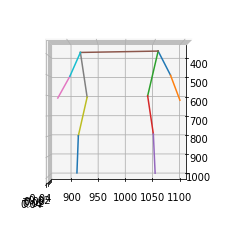

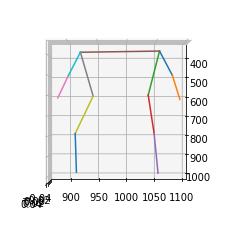

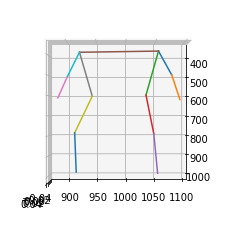

In [17]:
drawP(raw_data.head(3),True)

## <font color='green'> Angle [4] </font>

In [18]:
def multiDimenDist(point1,point2):
    #find the difference between the two points, its really the same as below
    deltaVals = [point2[dimension]-point1[dimension] for dimension in range(len(point1))]
    runningSquared = 0
    #because the pythagarom theorm works for any dimension we can just use that
    for coOrd in deltaVals:
        runningSquared += coOrd**2
    return runningSquared**(1/2)
def findVec(point1,point2,unitSphere = False):
    #setting unitSphere to True will make the vector scaled down to a sphere with a radius one, instead of it's orginal length
    finalVector = [0 for coOrd in point1]
    for dimension, coOrd in enumerate(point1):
        #finding total differnce for that co-ordinate(x,y,z...)
        deltaCoOrd = point2[dimension]-coOrd
        #adding total difference
        finalVector[dimension] = deltaCoOrd
    if unitSphere:
        totalDist = multiDimenDist(point1,point2)
        unitVector =[]
        for dimen in finalVector:
            unitVector.append( dimen/totalDist)
        return unitVector
    else:
        return finalVector

In [19]:
def angleP(data,posenet=False):
    try:
        aug_data = data.copy()
        if posenet:
            for index, row in aug_data.iterrows():
                #LEFT
                vector_11 = findVec([row['leftShoulder_x'],row['leftShoulder_y']], [row['leftElbow_x'],row['leftElbow_y']])
                vector_12 = findVec([row['leftShoulder_x'],row['leftShoulder_y']], [row['leftHip_x'],row['leftHip_y']])

                unit_vector_11 = vector_11 / np.linalg.norm(vector_11)
                unit_vector_12 = vector_12 / np.linalg.norm(vector_12)
                angle_left_1 = np.arccos(np.dot(unit_vector_11, unit_vector_12))

                #print(np.degrees(angle_left_1))
                
                vector_13 = findVec([row['leftElbow_x'],row['leftElbow_y']], [row['leftShoulder_x'],row['leftShoulder_y']])
                vector_14 = findVec([row['leftElbow_x'],row['leftElbow_y']], [row['leftWrist_x'],row['leftWrist_y']])

                unit_vector_13 = vector_13 / np.linalg.norm(vector_13)
                unit_vector_14 = vector_14 / np.linalg.norm(vector_14)
                angle_left_2 = np.arccos(np.dot(unit_vector_13, unit_vector_14))

                #print(np.degrees(angle_left_2))
                
                #RIGHT
                vector_21 = findVec([row['rightShoulder_x'],row['rightShoulder_y']], [row['rightElbow_x'],row['rightElbow_y']])
                vector_22 = findVec([row['rightShoulder_x'],row['rightShoulder_y']], [row['rightHip_x'],row['rightHip_y']])

                unit_vector_21 = vector_21 / np.linalg.norm(vector_21)
                unit_vector_22 = vector_22 / np.linalg.norm(vector_22)
                angle_right_1 = np.arccos(np.dot(unit_vector_21, unit_vector_22))

                #print(np.degrees(angle_right_1))
                
                vector_23 = findVec([row['rightElbow_x'],row['rightElbow_y']], [row['rightShoulder_x'],row['rightShoulder_y']])
                vector_24 = findVec([row['rightElbow_x'],row['rightElbow_y']], [row['rightWrist_x'],row['rightWrist_y']])

                unit_vector_23 = vector_23 / np.linalg.norm(vector_23)
                unit_vector_24 = vector_24 / np.linalg.norm(vector_24)
                angle_right_2 = np.arccos(np.dot(unit_vector_23, unit_vector_24))

                #print(np.degrees(angle_right_2))
                
                aug_data.loc[index,'angle_left_1'] = angle_left_1
                aug_data.loc[index,'angle_left_2'] = angle_left_2
                aug_data.loc[index,'angle_right_1'] = angle_right_1
                aug_data.loc[index,'angle_right_2'] = angle_right_2
        else:
            for index, row in aug_data.iterrows():
                #LEFT
                vector_11 = findVec([row['left_shoulder_x'],row['left_shoulder_y']], [row['left_elbow_x'],row['left_elbow_y']])
                vector_12 = findVec([row['left_shoulder_x'],row['left_shoulder_y']], [row['left_hip_x'],row['left_hip_y']])

                unit_vector_11 = vector_11 / np.linalg.norm(vector_11)
                unit_vector_12 = vector_12 / np.linalg.norm(vector_12)
                angle_left_1 = np.arccos(np.dot(unit_vector_11, unit_vector_12))

                #print(np.degrees(angle_left_1))
                
                vector_13 = findVec([row['left_elbow_x'],row['left_elbow_y']], [row['left_shoulder_x'],row['left_shoulder_y']])
                vector_14 = findVec([row['left_elbow_x'],row['left_elbow_y']], [row['left_wrist_x'],row['left_wrist_y']])

                unit_vector_13 = vector_13 / np.linalg.norm(vector_13)
                unit_vector_14 = vector_14 / np.linalg.norm(vector_14)
                angle_left_2 = np.arccos(np.dot(unit_vector_13, unit_vector_14))

                #print(np.degrees(angle_left_2))
                
                #RIGHT
                vector_21 = findVec([row['right_shoulder_x'],row['right_shoulder_y']], [row['right_elbow_x'],row['right_elbow_y']])
                vector_22 = findVec([row['right_shoulder_x'],row['right_shoulder_y']], [row['right_hip_x'],row['right_hip_y']])

                unit_vector_21 = vector_21 / np.linalg.norm(vector_21)
                unit_vector_22 = vector_22 / np.linalg.norm(vector_22)
                angle_right_1 = np.arccos(np.dot(unit_vector_21, unit_vector_22))

                #print(np.degrees(angle_right_1))
                
                vector_23 = findVec([row['right_elbow_x'],row['right_elbow_y']], [row['right_shoulder_x'],row['right_shoulder_y']])
                vector_24 = findVec([row['right_elbow_x'],row['right_elbow_y']], [row['right_wrist_x'],row['right_wrist_y']])

                unit_vector_23 = vector_23 / np.linalg.norm(vector_23)
                unit_vector_24 = vector_24 / np.linalg.norm(vector_24)
                angle_right_2 = np.arccos(np.dot(unit_vector_23, unit_vector_24))

                #print(np.degrees(angle_right_2))
                
                aug_data.loc[index,'angle_left_1'] = angle_left_1
                aug_data.loc[index,'angle_left_2'] = angle_left_2
                aug_data.loc[index,'angle_right_1'] = angle_right_1
                aug_data.loc[index,'angle_right_2'] = angle_right_2
        
        return aug_data
    except IOError as e:
        print(e)

In [20]:
aug_data = angleP(raw_data.head(3),True)
print(aug_data)

   FrameNo      head_x      head_y  leftShoulder_x  leftShoulder_y  \
0        0  262.066742  994.135620      375.759686     1057.411090   
1        1  263.581139  992.800872      375.749203     1056.170479   
2        2  263.243067  993.016745      375.931049     1055.647247   

   rightShoulder_x  rightShoulder_y  leftElbow_x  leftElbow_y  rightElbow_x  \
0       382.580955       920.305207   496.493179  1079.227467    501.843892   
1       381.573855       920.501798   496.708486  1078.117512    498.224803   
2       381.855203       920.968293   495.078997  1078.130609    501.484271   

   ...  rightKnee_y  leftAnkle_x  leftAnkle_y  rightAnkle_x  rightAnkle_y  \
0  ...   916.659549   987.035062  1052.085086    985.324309    914.177256   
1  ...   911.572589   987.674662  1053.617341    982.446002    913.666266   
2  ...   912.766431   988.034841  1054.136438    982.152660    915.409163   

   status  angle_left_1  angle_left_2  angle_right_1  angle_right_2  
0       0      0.261094